In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [45]:
# Load gambar
img = cv2.imread("nama2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [47]:
# Mask warna merah
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))

# Mask warna hijau
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Mask warna biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

In [49]:
# Fungsi untuk menebalkan mask (dilasi)
def bold_text(mask):
    kernel = np.ones((3, 3), np.uint8)
    thick_mask = cv2.dilate(mask, kernel, iterations=1)
    return thick_mask

# Fungsi untuk membuat teks hitam di atas latar putih
def apply_black_text_on_white_bg(mask):
    white_bg = np.full_like(img_rgb, 255)  # latar putih
    black_text = np.zeros_like(img_rgb)    # teks hitam
    thick_mask = bold_text(mask)           # pertebal teks
    text_black = cv2.bitwise_and(black_text, black_text, mask=thick_mask)
    inverted_mask = cv2.bitwise_not(thick_mask)
    background_white = cv2.bitwise_and(white_bg, white_bg, mask=inverted_mask)
    return cv2.add(background_white, text_black)

In [51]:
# Terapkan fungsi untuk tiap warna
highlight_blue_blacktext = apply_black_text_on_white_bg(mask_blue)
highlight_red_blacktext = apply_black_text_on_white_bg(mask_red)
highlight_green_blacktext = apply_black_text_on_white_bg(mask_green)

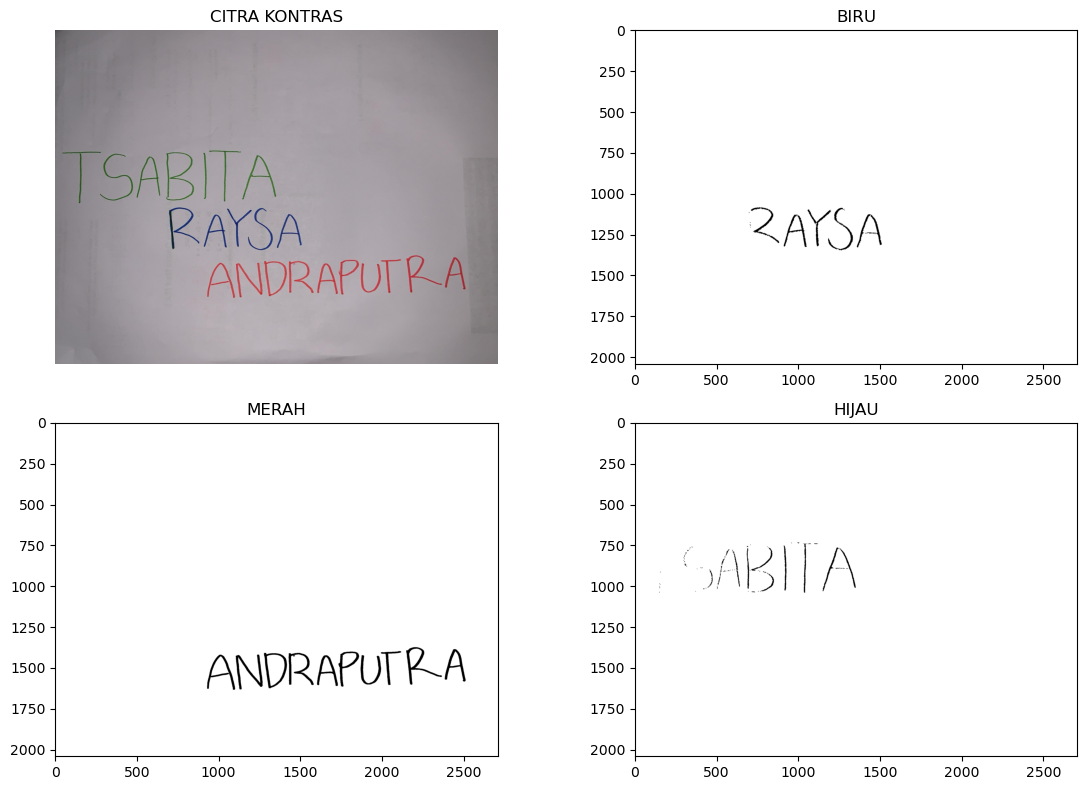

In [53]:
# Tampilkan hasil akhir
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(highlight_blue_blacktext)
plt.title("BIRU")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(highlight_red_blacktext)
plt.title("MERAH")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(highlight_green_blacktext)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

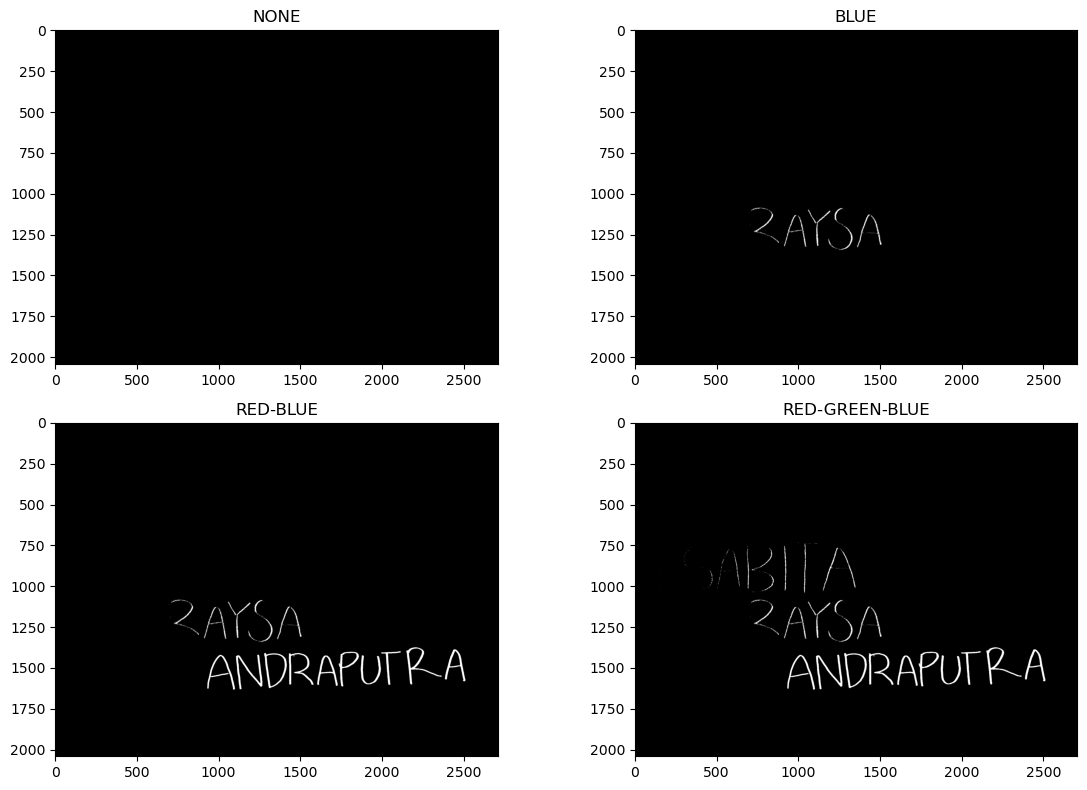

In [63]:
# Merah: dua rentang
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(
    cv2.inRange(hsv, lower_red1, upper_red1),
    cv2.inRange(hsv, lower_red2, upper_red2)
)

# Hijau
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Gabungan
none = np.zeros_like(img_rgb[:, :, 0])  # kosong
red_blue = cv2.bitwise_or(mask_red, mask_blue)
rgb_all = cv2.bitwise_or(red_blue, mask_green)

# Daftar judul dan hasil
titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
images = [none, mask_blue, red_blue, rgb_all]

# Plot hasil
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [76]:
# Load gambar
img = cv2.imread('backlight1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [78]:
# Perbaikan Kecerahan
def brighten(img_gray, value=50):
    return cv2.add(img_gray, value)

# Perbaikan Kontras
def enhance_contrast(img_gray):
    return cv2.equalizeHist(img_gray)

In [80]:
# Perbaikan Kecerahan + Kontras
bright = brighten(gray)
contrast = enhance_contrast(gray)
bright_contrast = enhance_contrast(bright)

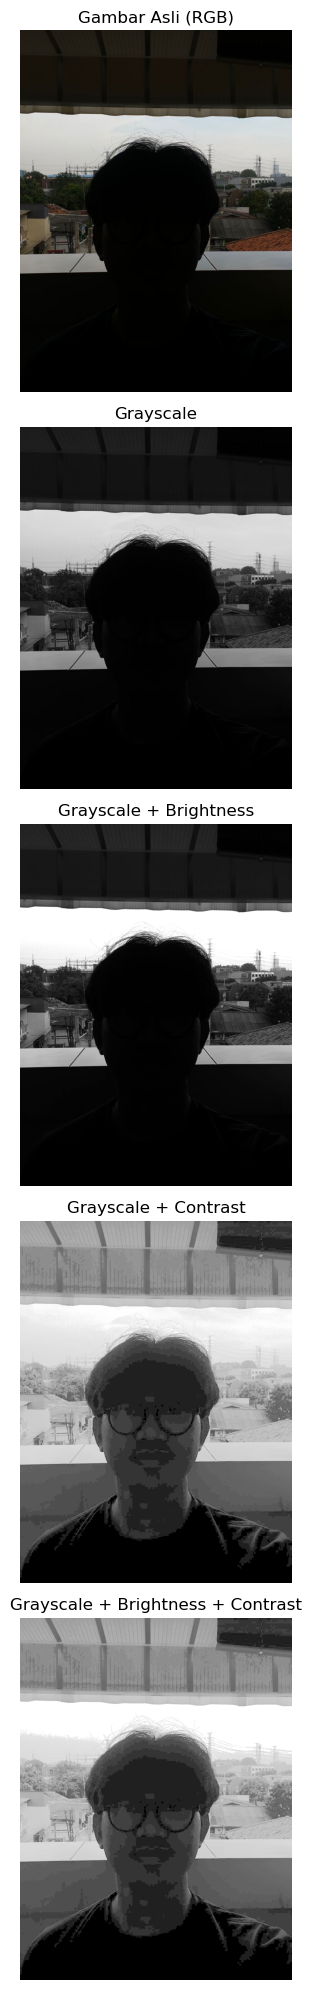

In [82]:
# Plot hasil ke bawah (vertikal)
titles = ['Gambar Asli (RGB)', 'Grayscale', 'Grayscale + Brightness', 
          'Grayscale + Contrast', 'Grayscale + Brightness + Contrast']
images = [img_rgb, gray, bright, contrast, bright_contrast]
cmaps = [None, 'gray', 'gray', 'gray', 'gray']

plt.figure(figsize=(6, 20))  # Ukuran vertikal
for i in range(len(images)):
    plt.subplot(len(images), 1, i + 1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()